# **Install libraries and packages**

In [2]:
import os
# the base Google Drive directory
root_dir = "/content/"

# choose where you want your project files to be saved
project_folder = "drive/MyDrive/Colab Notebooks/dementia/"
os.chdir(root_dir + project_folder)

In [5]:
!pip install transformers==4.28.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.9 MB/s eta 0:00:00


In [6]:
!pip install accelerate -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 7.3 MB/s eta 0:00:00


In [3]:
# install packages
!pip install datasets evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 19.5 MB/s eta 0:00:00


In [7]:
# Libraries
from datasets import load_dataset, Audio, dataset_dict, concatenate_datasets, list_metrics
from transformers import AutoFeatureExtractor
from transformers import AutoModelForAudioClassification, TrainingArguments, Trainer, EarlyStoppingCallback
from torch import nn
import numpy as np
from datasets import load_metric
import evaluate
from copy import deepcopy
from transformers.trainer_callback import TrainerCallback
from transformers.optimization import Adafactor, AdafactorSchedule
from sklearn import metrics
import matplotlib.pyplot as plt

# **Load and preprocessing the training set**

In [9]:
#load training data
final_data=load_dataset('/content/drive/MyDrive/Colab Notebooks/dementia/English/Pitt/train/', name="en-US")

Resolving data files:   0%|          | 0/1277 [00:00<?, ?it/s]

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /usr/local/lib/python3.10/dist-packages/datasets/builder.py:1608 in _prepare_split_single        │
│                                                                                                  │
│   1605 │   │   │   )                                                                             │
│   1606 │   │   │   try:                                                                          │
│   1607 │   │   │   │   _time = time.time()                                                       │
│ ❱ 1608 │   │   │   │   for key, record in generator:                                             │
│   1609 │   │   │   │   │   if max_shard_size is not None and writer._num_bytes > max_shard_size  │
│   1610 │   │   │   │   │   │   num_examples, num_bytes = writer.finalize()                       │
│   1611 │   │   │   │   │   │   writer.close()                                                    │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/datasets/packaged_modules/folder_based_builder/folder_ba │
│ sed_builder.py:304 in _generate_examples                                                         │
│                                                                                                  │
│   301 │   │   │   │   │   │   │   │   │   )                                                      │
│   302 │   │   │   │   │   │   │   │   }                                                          │
│   303 │   │   │   │   │   │   │   else:                                                          │
│ ❱ 304 │   │   │   │   │   │   │   │   raise ValueError(                                          │
│   305 │   │   │   │   │   │   │   │   │   f"One or several metadata.{metadata_ext} were found,   │
│   306 │   │   │   │   │   │   │   │   )                                                          │
│   307 │   │   │   │   │   │   if metadata_dir is not None and downloaded_metadata_file is not    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: One or several metadata.csv were found, but not in the same directory or in a parent directory of 
/content/drive/MyDrive/Colab Notebooks/dementia/English/Pitt/train/control/002-0.wav.

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 2>:2                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/datasets/load.py:1797 in load_dataset                    │
│                                                                                                  │
│   1794 │   try_from_hf_gcs = path not in _PACKAGED_DATASETS_MODULES                              │
│   1795 │                                                                                         │
│   1796 │   # Download and prepare data                                                           │
│ ❱ 1797 │   builder_instance.download_and_prepare(                                                │
│   1798 │   │   download_config=download_config,                                                  │
│   1799 │   │   download_mode=download_mode,                                                      │
│   1800 │   │   verification_mode=verification_mode,                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/datasets/builder.py:890 in download_and_prepare          │
│                                                                                               

In [8]:
# load the Wa2vec model as a featrue extractor   
feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-base")

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:379: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [ ]:
final_data = final_data.cast_column("audio", Audio(sampling_rate=16_000))

In [12]:
# Extract "audio" array and resample the dataset to 16000kHz to use the pretrained Wav2Vec2 model
def preprocess_function(examples):
     audio_arrays = [x["array"] for x in examples["audio"]]
     inputs = feature_extractor(
            audio_arrays, sampling_rate=feature_extractor.sampling_rate, max_length=1600, truncation=True
     )
     return inputs

In [ ]:
processed_final_data = final_data.map(preprocess_function, batched=True, writer_batch_size=2, batch_size=2)

In [ ]:
# Split data into training and validation sets
processed_final_data = processed_final_data['train'].train_test_split(test_size=0.2)

In [11]:
# get the labels in the training data
labels = processed_final_data["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
   label2id[label] = str(i)
   id2label[str(i)] = label

# **Build the model**

In [ ]:
# Loadoad the pre-trained wav2vec model
#num_labels = len(id2label)
num_labels = len(id2label)
model = AutoModelForAudioClassification.from_pretrained(
   "facebook/wav2vec2-base", num_labels=num_labels, label2id=label2id, id2label=id2label)

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:379: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of the model checkpoint at facebook/wav2vec2-base were not used when initializing Wav2Vec2ForSequenceClassification: ['quantizer.weight_proj.bias', 'quantizer.codevectors', 'project_q.weight', 'project_q.bias', 'project_hid.weight', 'quantizer.weight_proj.weight', 'project_hid.bias']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceC

In [ ]:
# disable the gradient computation for the feature encoder so that its parameter will not be updated during training.
model.freeze_feature_encoder()

In [ ]:
# Using AUROC as the metric
roc_auc = evaluate.load("roc_auc")
def compute_metrics(eval_pred):
        predictions = np.argmax(eval_pred.predictions, axis=1)
        return roc_auc.compute(prediction_scores=predictions, references=eval_pred.label_ids)

In [ ]:
# hyperparameters of the model 
#(Note that the model was trained with a learning rate 1e-7 for 2-3 epochs and another learning rate 1e-5 for 30 epochs)
training_args = TrainingArguments(
       evaluation_strategy="epoch",
       output_dir="/content/drive/MyDrive/Colab Notebooks/dementia",
       save_strategy="epoch",
       learning_rate=1e-5,
       per_device_train_batch_size=16,
       gradient_accumulation_steps=1,
       per_device_eval_batch_size=16,
       num_train_epochs=30,
       warmup_ratio=0.1,
       logging_steps=10,
       weight_decay=0.01,
       load_best_model_at_end=True,
       metric_for_best_model="roc_auc",
 )
#optimizer = Adafactor(model.parameters(), relative_step=False, warmup_init=False)
#lr_scheduler = AdafactorSchedule(optimizer)
#optimizers = optimizer, lr_scheduler

In [ ]:
trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=processed_final_data['train'],
        eval_dataset=processed_final_data["test"],
        tokenizer=feature_extractor,
        compute_metrics=compute_metrics
        )

In [ ]:
# Override the loss function with a binary cross-entropy loss fuction
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss (suppose one has 2 labels with different weights)
        loss_fct = nn.BCELoss()
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss

In [ ]:
# an override function which outputs the training auroc scores
class CustomCallback(TrainerCallback):
    
    def __init__(self, trainer) -> None:
        super().__init__()
        self._trainer = trainer
    
    def on_epoch_end(self, args, state, control, **kwargs):
        if control.should_evaluate:
            control_copy = deepcopy(control)
            self._trainer.evaluate(eval_dataset=self._trainer.train_dataset, metric_key_prefix="train")
            return control_copy

# **Train the model**

In [ ]:
# save the training set
#processed_final_data.save_to_disk('/content/drive/MyDrive/Colab Notebooks/dementia/processed_final_data')

In [ ]:
# training using the tune-hyperparameters
# first row of each epoch shows the training auroc : the model achieved 80% training auroc and 70% validation auroc scores
trainer.add_callback(CustomCallback(trainer)) 
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Roc Auc
1,0.506300,0.483084,0.500000
1,0.506300,0.470837,0.500000
2,0.458300,0.459882,0.500000
2,0.458300,0.454305,0.500000
3,0.585300,0.500983,0.500000
3,0.585300,0.492568,0.500000
4,0.434400,0.465278,0.500000
4,0.434400,0.455374,0.500000
5,0.515100,0.461661,0.500000
5,0.515100,0.453597,0.500000


TrainOutput(global_step=1920, training_loss=0.39468759497006733, metrics={'train_runtime': 1983.8078, 'train_samples_per_second': 15.425, 'train_steps_per_second': 0.968, 'total_flos': 2.77806158784e+17, 'train_loss': 0.39468759497006733, 'epoch': 30.0})

# **Perform a cross-validation**

In [13]:
# perform cross-validation
from transformers import AutoFeatureExtractor
from transformers import AutoModelForAudioClassification, TrainingArguments, Trainer, EarlyStoppingCallback
import numpy as np
from datasets import load_metric
import evaluate
from copy import deepcopy
from transformers.trainer_callback import TrainerCallback
from torch import nn

roc_auc = evaluate.load("roc_auc")
def compute_metrics(eval_pred):
        predictions = np.argmax(eval_pred.predictions, axis=1)
        return roc_auc.compute(prediction_scores=predictions, references=eval_pred.label_ids)
num_labels = len(id2label)     

for i in range(4):
# hyperparameter search space   
  lr=[5e-8, 1e-8, 5e-7, 1e-7]
  feature_extractor = AutoFeatureExtractor.from_pretrained("facebook/wav2vec2-base")
  training_args = TrainingArguments(
       evaluation_strategy="epoch",
       output_dir="/content/drive/MyDrive/Colab Notebooks/dementia",
       save_strategy="epoch",
       learning_rate=lr[i],
       per_device_train_batch_size=16,
       gradient_accumulation_steps=1,
       per_device_eval_batch_size=16,
       num_train_epochs=5,
       warmup_ratio=0.1,
       logging_steps=10,
       weight_decay=0.01,
       load_best_model_at_end=True,
       metric_for_best_model="roc_auc",
 )
  processed_final_data = processed_final_data_validation.train_test_split(test_size=0.2)
  model = AutoModelForAudioClassification.from_pretrained("facebook/wav2vec2-base", num_labels=num_labels, label2id=label2id, id2label=id2label)
  model.freeze_feature_encoder() 
  trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=processed_final_data['train'],
        eval_dataset=processed_final_data["test"],
        tokenizer=feature_extractor,
        compute_metrics=compute_metrics
        ) 
  class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss (suppose one has 2 labels with different weights)
        loss_fct = nn.BCELoss()
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss
   # an override function which outputs the training auroc scores
  class CustomCallback(TrainerCallback):
    def __init__(self, trainer) -> None:
        super().__init__()
        self._trainer = trainer
    
    def on_epoch_end(self, args, state, control, **kwargs):
        if control.should_evaluate:
            control_copy = deepcopy(control)
            self._trainer.evaluate(eval_dataset=self._trainer.train_dataset, metric_key_prefix="train")
            return control_copy   
  trainer.add_callback(CustomCallback(trainer))
  trainer.train()   
  # the model has to be trained twice with different learning rates       
  training_args = TrainingArguments(
       evaluation_strategy="epoch",
       output_dir="/content/drive/MyDrive/Colab Notebooks/dementia",
       save_strategy="epoch",
       learning_rate=1e-5,
       per_device_train_batch_size=16,
       gradient_accumulation_steps=1,
       per_device_eval_batch_size=16,
       num_train_epochs=35,
       warmup_ratio=0.1,
       logging_steps=10,
       weight_decay=0.01,
       load_best_model_at_end=True,
       metric_for_best_model="roc_auc",
      )
  trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=processed_final_data['train'],
        eval_dataset=processed_final_data["test"],
        tokenizer=feature_extractor,
        compute_metrics=compute_metrics
        ) 
  class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels")
        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits")
        # compute custom loss (suppose one has 2 labels with different weights)
        loss_fct = nn.BCELoss()
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))
        return (loss, outputs) if return_outputs else loss
  class CustomCallback(TrainerCallback):
    def __init__(self, trainer) -> None:
        super().__init__()
        self._trainer = trainer
    
    def on_epoch_end(self, args, state, control, **kwargs):
        if control.should_evaluate:
            control_copy = deepcopy(control)
            self._trainer.evaluate(eval_dataset=self._trainer.train_dataset, metric_key_prefix="train")
            return control_copy   
  trainer.add_callback(CustomCallback(trainer)) 
  trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:379: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


Some weights of the model checkpoint at facebook/wav2vec2-base were not used when initializing Wav2Vec2ForSequenceClassification: ['project_q.weight', 'project_q.bias', 'project_hid.bias', 'quantizer.codevectors', 'project_hid.weight', 'quantizer.weight_proj.bias', 'quantizer.weight_proj.weight']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['projector.bias', 'projector.weight', 'classifier.

Epoch,Training Loss,Validation Loss,Roc Auc
1,0.687900,0.696528,0.450787
1,0.687900,0.696614,0.450472
2,0.687000,0.692770,0.462424
2,0.687000,0.692655,0.455832
3,0.681100,0.690112,0.454106
3,0.681100,0.689980,0.489708
4,0.676900,0.688519,0.462524
4,0.676900,0.688349,0.500000
5,0.678100,0.687984,0.472285
5,0.678100,0.687787,0.509434


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Roc Auc
1,0.605700,0.580729,0.500000
1,0.605700,0.573924,0.500000
2,0.536300,0.497921,0.500000
2,0.536300,0.463930,0.500000
3,0.490600,0.481705,0.500000
3,0.490600,0.448990,0.500000
4,0.420800,0.466263,0.500000
4,0.420800,0.443299,0.500000
5,0.467900,0.455824,0.500000
5,0.467900,0.434688,0.500000


/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:379: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of the model checkpoint at facebook/wav2vec2-base were not used when initializing Wav2Vec2ForSequenceClassification: ['project_q.weight', 'project_q.bias', 'project_hid.bias', 'quantizer.codevectors', 'project_hid.weight', 'quantizer.weight_proj.bias', 'quantizer.weight_proj.weight']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceC

Epoch,Training Loss,Validation Loss,Roc Auc
1,0.674200,0.685419,0.486602
1,0.674200,0.683689,0.499571
2,0.670900,0.684569,0.487154
2,0.670900,0.682788,0.504717
3,0.674600,0.683957,0.483407
3,0.674600,0.682135,0.511792
4,0.668000,0.683620,0.482780
4,0.668000,0.681774,0.514151
5,0.668400,0.683540,0.482780
5,0.668400,0.681688,0.514151


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Roc Auc
1,0.590300,0.567511,0.500000
1,0.590300,0.553843,0.500000
2,0.447100,0.496943,0.500000
2,0.447100,0.459808,0.500000
3,0.540800,0.491033,0.500000
3,0.540800,0.452031,0.500000
4,0.492700,0.500402,0.500000
4,0.492700,0.457434,0.500000
5,0.506400,0.496175,0.500000
5,0.506400,0.454508,0.500000


/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:379: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of the model checkpoint at facebook/wav2vec2-base were not used when initializing Wav2Vec2ForSequenceClassification: ['project_q.weight', 'project_q.bias', 'project_hid.bias', 'quantizer.codevectors', 'project_hid.weight', 'quantizer.weight_proj.bias', 'quantizer.weight_proj.weight']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceC

Epoch,Training Loss,Validation Loss,Roc Auc
1,0.645900,0.646312,0.499388
1,0.645900,0.642076,0.500000
2,0.598000,0.613260,0.500000
2,0.598000,0.604973,0.500000
3,0.594600,0.592972,0.500000
3,0.594600,0.583035,0.500000
4,0.569700,0.582549,0.500000
4,0.569700,0.571264,0.500000
5,0.569700,0.578964,0.500000
5,0.569700,0.567255,0.500000


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Roc Auc
1,0.571800,0.550872,0.500000
1,0.571800,0.534078,0.500000
2,0.444600,0.496526,0.500000
2,0.444600,0.458830,0.500000
3,0.536000,0.487461,0.500000
3,0.536000,0.447496,0.500000
4,0.491100,0.497627,0.500000
4,0.491100,0.456698,0.500000
5,0.490600,0.467843,0.500000
5,0.490600,0.442641,0.500000


/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:379: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of the model checkpoint at facebook/wav2vec2-base were not used when initializing Wav2Vec2ForSequenceClassification: ['project_q.weight', 'project_q.bias', 'project_hid.bias', 'quantizer.codevectors', 'project_hid.weight', 'quantizer.weight_proj.bias', 'quantizer.weight_proj.weight']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceC

Epoch,Training Loss,Validation Loss,Roc Auc
1,0.668800,0.678128,0.496033
1,0.668800,0.675783,0.511578
2,0.656100,0.669716,0.493358
2,0.656100,0.666835,0.517581
3,0.656800,0.663590,0.498836
3,0.656800,0.660433,0.527015
4,0.645200,0.659870,0.497567
4,0.645200,0.656511,0.506647
5,0.645600,0.658648,0.497567
5,0.645600,0.655240,0.506647


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Roc Auc
1,0.580700,0.559046,0.500000
1,0.580700,0.544866,0.500000
2,0.446300,0.498071,0.500000
2,0.446300,0.458096,0.500000
3,0.528600,0.487021,0.500000
3,0.528600,0.450645,0.500000
4,0.474200,0.468940,0.500000
4,0.474200,0.432454,0.500000
5,0.484800,0.468641,0.500000
5,0.484800,0.440093,0.500000


In [ ]:
# save the trained model 
trainer.save_model('/content/drive/MyDrive/Colab Notebooks/dementia/fine_tuned_model/0511model2')

In [ ]:
# load the test set
dataset_test = load_dataset('/content/drive/MyDrive/Colab Notebooks/dementia/English/ADReSS-2021/audio/', name="en-US", split='train')
dataset_test = dataset_test.cast_column("audio", Audio(sampling_rate=16000))

Resolving data files:   0%|          | 0/166 [00:00<?, ?it/s]

# **Evaluate the model using the test set**

In [ ]:
# load the trained model for prediction
import torch
from transformers import AutoModelForAudioClassification, Trainer, TrainingArguments
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForAudioClassification.from_pretrained("/content/drive/MyDrive/Colab Notebooks/dementia/fine_tuned_model/0511model")
model=model.to(device)
trainer = Trainer(model)

In [ ]:
#pre-processing the test set 
processed_test_dataset = dataset_test.map(preprocess_function, batched=True, writer_batch_size=2, batch_size=2)

Map:   0%|          | 0/166 [00:00<?, ? examples/s]

In [ ]:
# save the test set
processed_test_dataset.save_to_disk('/content/drive/MyDrive/Colab Notebooks/dementia/processed_test_dataset')

Saving the dataset (0/1 shards):   0%|          | 0/166 [00:00<?, ? examples/s]

In [ ]:
# make predictions of test set
predictions, _, _=trainer.predict(processed_test_dataset)

In [ ]:
# get the prediction
final_prediction = np.argmax(predictions, axis=-1)

In [ ]:
# y_test
y=processed_test_dataset[0:166]['label']

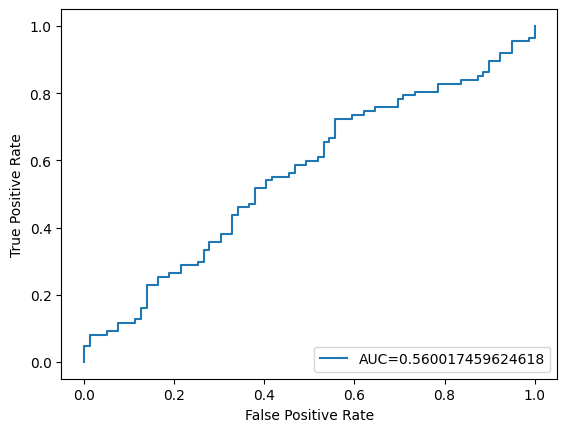

In [ ]:
# When I plot auroc curve, the model got updated so auroc score was worse than my optimal model (Need more work to figure out how to obtain the optimal model again).
#define metrics
fpr, tpr, _ = metrics.roc_curve(y,  predictions[:,1])
auc = metrics.roc_auc_score(y, predictions[:,1])

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
# the performance on the test set
from sklearn.metrics import roc_auc_score
roc_auc_score(y, predictions[:,1])

0.560017459624618

In [ ]:
# the performance on the test set (This is the optimal model I got)
from sklearn.metrics import roc_auc_score
roc_auc_score(y, predictions[:,1])

0.6784519132838644

In [10]:
# load the training set for cross-validation
from datasets import load_from_disk
processed_final_data=load_from_disk("/content/drive/MyDrive/Colab Notebooks/dementia/processed_final_data")
processed_final_data_validation=concatenate_datasets([processed_final_data['train'], processed_final_data['test']])